<a href="https://colab.research.google.com/github/ndeekshith/NN_from_sctrach/blob/main/PyTorchRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

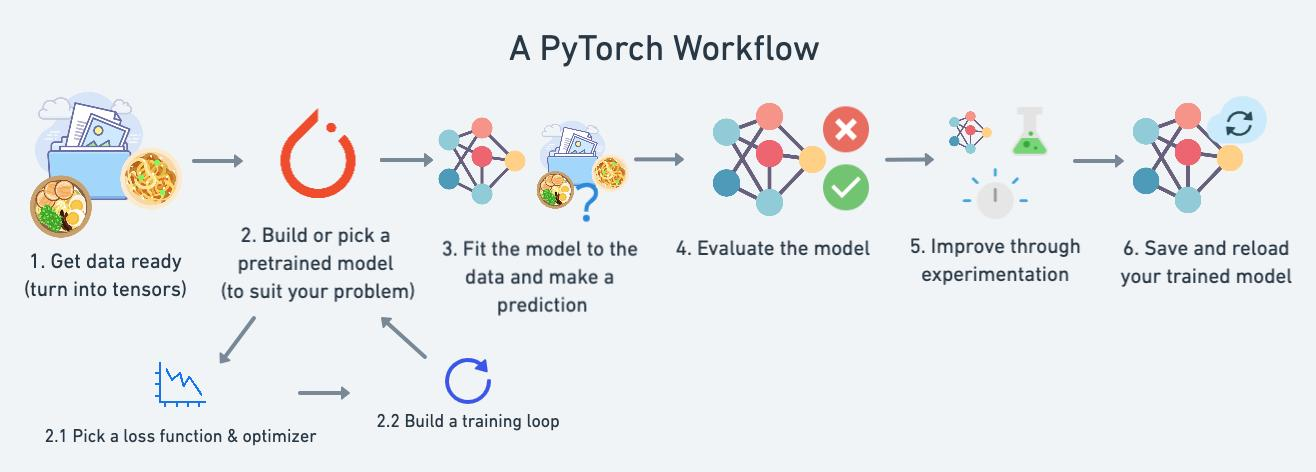

In [ ]:
# Importing all the necessary libraries
import torch
from torch import nn # it contains all blocks of nn
import matplotlib.pyplot as plt
# Checking the PyTorch version
torch.__version__

'2.6.0+cu124'

1. # Data (Preparing and Loading)

Data can be anything in ml
 * csv excel files
 * Images
 * Videos and Audios
 * DNA
 * Text

 ## Steps

1. Convert data into numerical representation

2. Build models to learn patterns in the numbres

In [ ]:
# Create  *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) # add additional dimension to the data(unsqueeze)
y = weight * X + bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
len(X),len(y)

(50, 50)

In [ ]:
# Splitting the data into traing and test sets
train_split = int(0.8 * len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data = X_train,
                      train_labels = y_train,
                      test_data = X_test,
                      test_labels = y_test,
                      predictions = None):
  plt.figure(figsize=(8,6))

   # plot the traing data

  plt.scatter(train_data,train_labels,c="b",s=4,label="Traing data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")
  plt.legend(prop={"size":14})

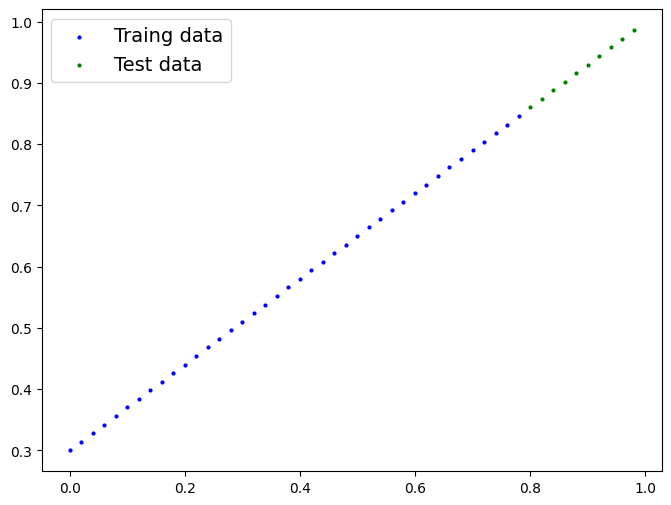

In [ ]:
plot_predictions()

In [ ]:
# from torch import nn
# # Create a linear regression model class
# class LinearRegressionModel(nn.Module): # (nn.Module contains all building blocks of nn)
#   def __init__(self): # Constructor
#     super().__init__()
#     # intialize model parameters
#     self.weights = nn.Parameter(torch.randn(1,                 # start with a random weight
#                                             requires_grad = True, # gradients which are required to update the the parameters
#                                             dtype=torch.float))  #  pyTorch loves to work with torch.float32
#     self.bias = nn.Parameter(torch.randn(1,
#                                          requires_grad = True,
#                                          dtype=torch.float))
#   # forward method to define the computation of the model
#   def forward(self,x:torch.Tensor) -> torch.Tensor:  # -> x is the input
#     return self.weights * x + self.bias # this is lr formula

In [ ]:
from torch import nn

# Create a linear regression model class
class LinearRegressionModel(nn.Module): # (nn.Module contains all building blocks of nn)
    def __init__(self): # Constructor
        super().__init__()
        # Initialize a single linear layer
        self.linear = nn.Linear(in_features=1, out_features=1)

    # forward method to define the computation of the model
    def forward(self, x: torch.Tensor) -> torch.Tensor:  # -> x is the input
        return self.linear(x) # apply the linear layer to the input

In [ ]:
torch.randn(1)

tensor([-0.1448])

In [ ]:
# Creating a random seed  (it is required to get same random number while changing to cpu and gpu)
torch.manual_seed(42)

# Creating a instance of the model
model_0 = LinearRegressionModel()
print(model_0)
print(model_0.state_dict())
list(model_0.parameters())

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)
OrderedDict([('linear.weight', tensor([[0.7645]])), ('linear.bias', tensor([0.8300]))])


[Parameter containing:
 tensor([[0.7645]], requires_grad=True),
 Parameter containing:
 tensor([0.8300], requires_grad=True)]

In [ ]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)

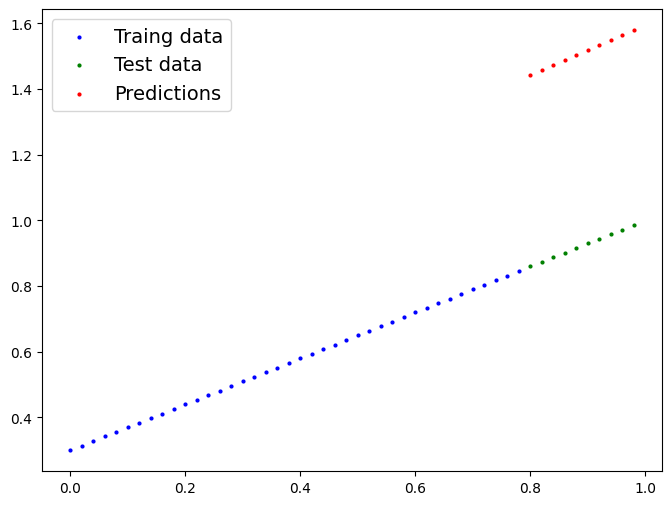

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
# Training the model

# Set up loss function
loss_fn = nn.L1Loss()

# setup the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [ ]:
loss_fn,optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     fused: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

In [ ]:
torch.manual_seed(42)
# Creating  the training loop
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []


for epoch in range(epochs):
  # set model to training mode
  model_0.train()  # train mode in PyTorch sets all parameters that require to compute gradients

  # Forward pass
  y_preds = model_0(X_train)

  # calculate loss function
  loss = loss_fn(y_preds,y_train)
  print(f"Loss:{loss}")

  # optimzer wit 0 grad
  optimizer.zero_grad()

  # Perfom backpropagation
  loss.backward()

  # Step the optimizer
  optimizer.step()

  model_0.eval() # Turns off the tracking of gradients
  with torch.inference_mode():
    test_preds = model_0(X_test)
    test_loss = loss_fn(test_preds,y_test)
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss)
      test_loss_values.append(test_loss)
      print(f"Epoch:{epoch} | Loss:{loss} | TestLoss:{test_loss}")

      # printing the model statedicts
      print(model_0.state_dict())

Loss:0.5551779866218567
Epoch:0 | Loss:0.5551779866218567 | TestLoss:0.5739762187004089
OrderedDict([('linear.weight', tensor([[0.7606]])), ('linear.bias', tensor([0.8200]))])
Loss:0.5436569452285767
Loss:0.5321359634399414
Loss:0.5206149816513062
Loss:0.5090939998626709
Loss:0.49757298827171326
Loss:0.4860519766807556
Loss:0.47453099489212036
Loss:0.4630100131034851
Loss:0.45148906111717224
Loss:0.4399680495262146
Epoch:10 | Loss:0.4399680495262146 | TestLoss:0.4392663538455963
OrderedDict([('linear.weight', tensor([[0.7216]])), ('linear.bias', tensor([0.7200]))])
Loss:0.42844706773757935
Loss:0.41692614555358887
Loss:0.4054051339626312
Loss:0.3938841223716736
Loss:0.38236314058303833
Loss:0.3708421289920807
Loss:0.35932114720344543
Loss:0.34780019521713257
Loss:0.3362792134284973
Loss:0.3247582018375397
Epoch:20 | Loss:0.3247582018375397 | TestLoss:0.30455657839775085
OrderedDict([('linear.weight', tensor([[0.6826]])), ('linear.bias', tensor([0.6200]))])
Loss:0.31323719024658203
Loss

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([0.555178  , 0.43996805, 0.3247582 , 0.20954828, 0.09433845,
        0.02388639, 0.0199568 , 0.01651799, 0.01308917, 0.00965318,
        0.00621568, 0.00278724, 0.0012645 , 0.0012645 , 0.0012645 ,
        0.0012645 , 0.0012645 , 0.0012645 , 0.0012645 , 0.0012645 ],
       dtype=float32),
 [tensor(0.5740),
  tensor(0.4393),
  tensor(0.3046),
  tensor(0.1698),
  tensor(0.0351),
  tensor(0.0478),
  tensor(0.0458),
  tensor(0.0375),
  tensor(0.0299),
  tensor(0.0217),
  tensor(0.0141),
  tensor(0.0058),
  tensor(0.0138),
  tensor(0.0138),
  tensor(0.0138),
  tensor(0.0138),
  tensor(0.0138),
  tensor(0.0138),
  tensor(0.0138),
  tensor(0.0138)])

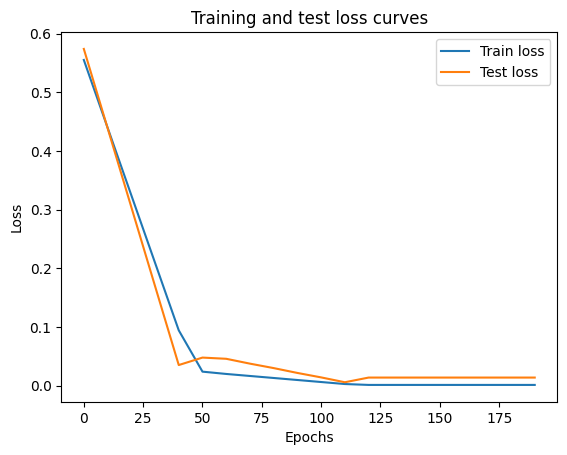

In [ ]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

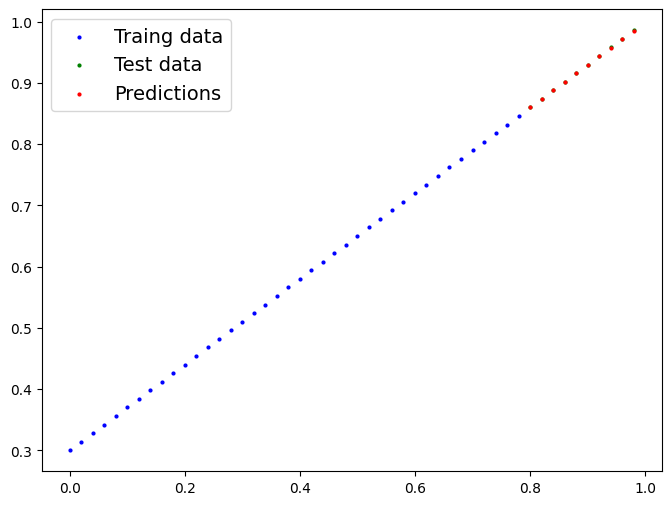

In [ ]:
plot_predictions(predictions=test_preds)

In [ ]:
# Saving the Pytorch Model
from pathlib import Path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
print(MODEL_SAVE_PATH)

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

models/01_pytorch_workflow_model_0.pth
Saving model to models/01_pytorch_workflow_model_0.pth


In [ ]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1744 May  5 09:17 01_pytorch_workflow_model_0.pth


In [ ]:
# To load the saved model
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('linear.weight', tensor([[0.6968]])),
             ('linear.bias', tensor([0.3025]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [ ]:
model_0.eval()
with torch.inference_mode():
  model_preds = model_0(X_test)
model_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [ ]:
model_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])